In [31]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [32]:
# Composition of portfolio
tickers = ["NVDA", "AAPL", "MSFT", "GOOGL", "AMZN", "META", "AVGO", "TSLA", "BRK-B", "JPM",         # Major stocks in S&P 500
            "UNH","JNJ",                                                                            # Health care stocks
            "BIL", "SHV","GLD"                                                                      # cash, short-duration Treasuries, and gold
            ]

data = yf.download(tickers, start="2020-01-01", end="2025-01-01", auto_adjust=False)
returns = data.xs('Adj Close', axis=1, level=0).pct_change().dropna()
returns = returns[tickers]

# Bounds for each stocks
bounds = []
for t in tickers:
    if t in ["AAPL", "MSFT"]:
        bounds.append((0.02, 0.20))   # Core stocks: Min 2%, Max 20%
    elif t in ["NVDA", "TSLA"]:
        bounds.append((0.00, 0.15))   # High vol stocks: Max 15%
    elif t in ["GOOGL", "AMZN", "META", "AVGO"]:
        bounds.append((0.00, 0.18))   # large-cap growth stocks: Max 18%
    elif t in ["BRK-B", "JPM"]:
        bounds.append((0.00, 0.15))   # Finance: Max 15%
    elif t in ["BIL", "SHV","GLD"]:
        bounds.append((0.00, 0.05))   # cash, short-duration Treasuries, and gold
    else:
        bounds.append((0.00, 0.15))

[*********************100%***********************]  15 of 15 completed


In [33]:
# CVaR Optimized Portfolio

return_cvar=pd.read_csv('portfolio return.csv').set_index('Date')
return_cvar.head()

,Portfolio Return,Cumulative Return
Date,,
2020-06-29,0.009030,1.009030
2020-06-30,0.014579,1.023740
2020-07-01,0.012048,1.036075
2020-07-02,0.005754,1.042036
2020-07-06,0.023220,1.066232


In [34]:
# Weekly generated weights.
weight_cvar = pd.read_csv('weekly weights.csv')
weights= np.array(weight_cvar.iloc[-1,1:])
print(weights)

[0.046 0.178 0.02 0.0 0.0 0.044 0.0 0.0 0.15 0.112 0.15 0.15 0.05 0.05
 0.05]


In [35]:
# Cholesky Decomposition (Based on the Covariance Matrix)
# The covariance matrix captures both the volatility (Vol) of each asset and their correlations (Corr).
orig_cov = returns.cov()

In [36]:
orig_cov

Ticker,NVDA,AAPL,MSFT,GOOGL,AMZN,META,AVGO,TSLA,BRK-B,JPM,UNH,JNJ,BIL,SHV,GLD
Ticker,,,,,,,,,,,,,,,
NVDA,1.151956e-03,4.107172e-04,4.447873e-04,4.128316e-04,4.457806e-04,5.139462e-04,5.908159e-04,6.696540e-04,1.756894e-04,2.260578e-04,1.829849e-04,6.229273e-05,2.262879e-07,-1.176751e-08,4.264659e-05
AAPL,4.107172e-04,3.982282e-04,2.868916e-04,2.651143e-04,2.677328e-04,3.178416e-04,2.995470e-04,4.076558e-04,1.471426e-04,1.678176e-04,1.572419e-04,9.247350e-05,-4.223252e-08,-1.343211e-07,2.529364e-05
MSFT,4.447873e-04,2.868916e-04,3.690796e-04,2.934760e-04,2.953092e-04,3.367929e-04,3.076483e-04,3.630112e-04,1.410886e-04,1.658288e-04,1.561764e-04,9.015885e-05,7.921343e-09,-3.092874e-08,2.340923e-05
GOOGL,4.128316e-04,2.651143e-04,2.934760e-04,4.191177e-04,3.001724e-04,3.711559e-04,2.834389e-04,3.458476e-04,1.397881e-04,1.689231e-04,1.324670e-04,7.513840e-05,1.516153e-08,-4.625297e-08,2.582782e-05
AMZN,4.457806e-04,2.677328e-04,2.953092e-04,3.001724e-04,5.132561e-04,3.902335e-04,2.918570e-04,4.147592e-04,1.091985e-04,1.234737e-04,9.055331e-05,5.026322e-05,1.371571e-08,3.055151e-08,3.236858e-05
META,5.139462e-04,3.178416e-04,3.367929e-04,3.711559e-04,3.902335e-04,8.000059e-04,3.464268e-04,3.966560e-04,1.446941e-04,1.753384e-04,1.146863e-04,6.865414e-05,1.210783e-07,-1.809535e-08,2.560553e-05
AVGO,5.908159e-04,2.995470e-04,3.076483e-04,2.834389e-04,2.918570e-04,3.464268e-04,6.963875e-04,5.049493e-04,1.620849e-04,2.258969e-04,1.603106e-04,6.325017e-05,5.859247e-08,-2.701099e-07,3.223809e-05
TSLA,6.696540e-04,4.076558e-04,3.630112e-04,3.458476e-04,4.147592e-04,3.966560e-04,5.049493e-04,1.791015e-03,1.597208e-04,2.367626e-04,1.509267e-04,4.310550e-05,-4.572664e-07,-6.250403e-07,3.580860e-05
BRK-B,1.756894e-04,1.471426e-04,1.410886e-04,1.397881e-04,1.091985e-04,1.446941e-04,1.620849e-04,1.597208e-04,1.875556e-04,2.193761e-04,1.423786e-04,9.500618e-05,-1.821449e-08,-2.088622e-07,6.852893e-06


In [37]:
try:
    # L * L.T = Covariance
    L = np.linalg.cholesky(orig_cov.values)
    
# If the Covariance is non-positive definite. (Because of Multicollinearity)
except np.linalg.LinAlgError:
    print("Matrix regularization applied.")
    orig_cov += np.eye(len(orig_cov)) * 1e-6
    L = np.linalg.cholesky(orig_cov.values)

In [38]:
# Monte Carlo Simulation (Percentage Basis)
n_sims = 10000
simulated_returns = []

np.random.seed(123)

for _ in range(n_sims):
    # (1) Uncorrelated Random Shocks (Standard Normal)
    Z = np.random.normal(0, 1, len(tickers))
    
    # (2) Correlated Shocks (Returns)
    # Multiply random variable with L, embeding the Covariance structure of the returns.
    correlated_daily_returns = L @ Z
    
    # (3) Portfolio Return Calculation
    # Weighted Average (Weight * Asset Return)
    port_ret = np.dot(weights, correlated_daily_returns)
    simulated_returns.append(port_ret)

simulated_returns = np.array(simulated_returns)

In [39]:
# Result (Percentiles)
var_95 = np.percentile(simulated_returns, 5)
var_99 = np.percentile(simulated_returns, 1)

In [40]:
# Expected Shortfall (CVaR)
cvar_99 = simulated_returns[simulated_returns <= var_99].mean()

print("Monte Carlo Results (Daily %)")
print(f"95% VaR: {var_95:.2%}")
print(f"99% VaR: {var_99:.2%}")
print(f"99% CVaR (Expected Shortfall): {cvar_99:.2%}")


Monte Carlo Results (Daily %)
95% VaR: -1.89%
99% VaR: -2.67%
99% CVaR (Expected Shortfall): -3.15%


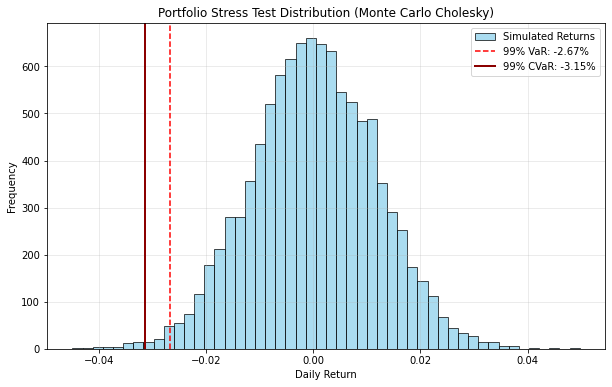

In [41]:
# Plot
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Simulated Returns')
plt.axvline(var_99, color='r', linestyle='--', label=f'99% VaR: {var_99:.2%}')
plt.axvline(cvar_99, color='darkred', linestyle='-', linewidth=2, label=f'99% CVaR: {cvar_99:.2%}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.title('Portfolio Stress Test Distribution (Monte Carlo Cholesky)')
plt.grid(True, alpha=0.3)
plt.show()

## Stress Test

In [42]:
# Recall the statistics
orig_cov = returns.cov()
orig_corr = returns.corr()
vols = returns.std()

In [43]:
orig_corr

Ticker,NVDA,AAPL,MSFT,GOOGL,AMZN,META,AVGO,TSLA,BRK-B,JPM,UNH,JNJ,BIL,SHV,GLD
Ticker,,,,,,,,,,,,,,,
NVDA,1.000000,0.606399,0.682141,0.594137,0.579744,0.535369,0.659643,0.466211,0.377974,0.325060,0.286374,0.148222,0.039818,-0.001806,0.128479
AAPL,0.606399,1.000000,0.748328,0.648932,0.592200,0.563116,0.568818,0.482701,0.538403,0.410425,0.418541,0.374234,-0.012639,-0.035060,0.129602
MSFT,0.682141,0.748328,1.000000,0.746182,0.678500,0.619807,0.606833,0.446489,0.536250,0.421271,0.431808,0.379001,0.002462,-0.008386,0.124593
GOOGL,0.594137,0.648932,0.746182,1.000000,0.647196,0.640976,0.524645,0.399179,0.498583,0.402701,0.343697,0.296406,0.004423,-0.011768,0.128999
AMZN,0.579744,0.592200,0.678500,0.647196,1.000000,0.608991,0.488177,0.432593,0.351953,0.265993,0.212311,0.179174,0.003616,0.007024,0.146091
META,0.535369,0.563116,0.619807,0.640976,0.608991,1.000000,0.464130,0.331374,0.373542,0.302547,0.215378,0.196025,0.025565,-0.003332,0.092567
AVGO,0.659643,0.568818,0.606833,0.524645,0.488177,0.464130,1.000000,0.452140,0.448489,0.417779,0.322680,0.193566,0.013260,-0.053315,0.124914
TSLA,0.466211,0.482701,0.446489,0.399179,0.432593,0.331374,0.452140,1.000000,0.275579,0.273040,0.189432,0.082257,-0.064529,-0.076930,0.086518
BRK-B,0.377974,0.538403,0.536250,0.498583,0.351953,0.373542,0.448489,0.275579,1.000000,0.781784,0.552224,0.560247,-0.007943,-0.079438,0.051165


In [44]:
# ---------------------------------------------------------
# STRESS 1: Correlation Breakdown
# ---------------------------------------------------------
# Force all cross-asset correlations to 0.9 
# eliminates diversification benefits
stressed_corr = orig_corr.copy()
for i in range(len(tickers)):
    for j in range(len(tickers)):
        if i != j:
            stressed_corr.iloc[i, j] = 0.9

In [45]:
stressed_corr

Ticker,NVDA,AAPL,MSFT,GOOGL,AMZN,META,AVGO,TSLA,BRK-B,JPM,UNH,JNJ,BIL,SHV,GLD
Ticker,,,,,,,,,,,,,,,
NVDA,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
AAPL,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
MSFT,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
GOOGL,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
AMZN,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
META,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
AVGO,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
TSLA,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9
BRK-B,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9


In [46]:
# ---------------------------------------------------------
# STRESS 2: Rising Volatility
# ---------------------------------------------------------
# Assume volatility doubles during crisis scenarios
stressed_vols = vols * 2

# Bulid new Stress Covariance Matrix: Cov = Vol * Corr * Vol
stressed_cov = np.outer(stressed_vols, stressed_vols) * stressed_corr.values

In [47]:
# ---------------------------------------------------------
# STRESS STEP 3: Cholesky & Simulation
# ---------------------------------------------------------
# Decompose after adding a small epsilon for numerical stability
# Why? to avoid singularity of the cov.
L_stress = np.linalg.cholesky(stressed_cov + np.eye(len(tickers)) * 1e-8)


In [48]:
n_sims = 10000
stress_results = []

np.random.seed(123)
for _ in range(n_sims):
    Z = np.random.normal(0, 1, len(tickers))
    
    correlated_returns = L_stress @ Z
    
    # STRESS 4: Deterministic Shock
    # Equity sector: -10%
    correlated_returns[0:10] -= 0.10 
    
    port_ret = np.dot(weights, correlated_returns)
    stress_results.append(port_ret)

stress_results = np.array(stress_results)

# Result
stress_var_99 = np.percentile(stress_results, 1)
baseline_returns = return_cvar # CVaR optimized Portfolio
history_var_99 = np.percentile(baseline_returns, 1)
print(f"Normal 99% VaR (Historical): {history_var_99:.2%}")
print(f"STRESSED 99% VaR: {stress_var_99:.2%}")

Normal 99% VaR (Historical): -1.72%
STRESSED 99% VaR: -12.85%


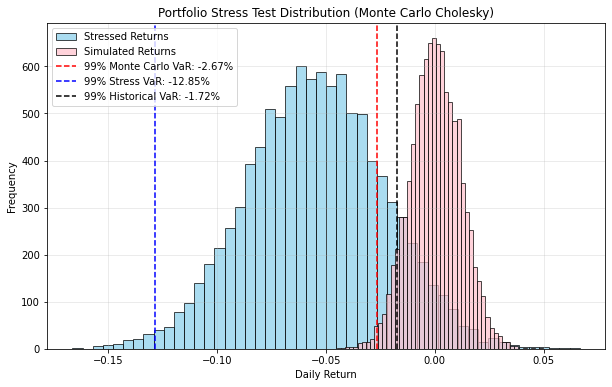

In [49]:
# Plot
plt.figure(figsize=(10, 6))
plt.hist(stress_results, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Stressed Returns')
plt.hist(simulated_returns, bins=50, alpha=0.7, color='pink', edgecolor='black', label='Simulated Returns')

plt.axvline(var_99, color='red', linestyle='--', label=f'99% Monte Carlo VaR: {var_99:.2%}')
plt.axvline(stress_var_99, color='blue', linestyle='--', label=f'99% Stress VaR: {stress_var_99:.2%}')
plt.axvline(history_var_99, color='black', linestyle='--', label=f'99% Historical VaR: {history_var_99:.2%}')

plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.title('Portfolio Stress Test Distribution (Monte Carlo Cholesky)')
plt.grid(True, alpha=0.3)
plt.show()

## Stress Test under EWMA variance

In [50]:
def calculate_EWMA_cov(returns,lam = 0.94, burn_in=30):
    initial_data = returns.iloc[:burn_in]
    current_cov = initial_data.cov().values

    for t in range(burn_in, len(returns)):
        prev_ret = returns.iloc[t-1].values.reshape(-1, 1)
        
        current_cov = lam * current_cov + (1 - lam) * (prev_ret @ prev_ret.T)
    
    return current_cov    

In [51]:
# Recent EWMA cov
orig_cov_EWMA = calculate_EWMA_cov(returns)
orig_corr = returns.corr()


In [66]:
# ---------------------------------------------------------
# STRESS 1: Correlation Breakdown
# ---------------------------------------------------------
# From EWMA, devide Cov Vol and Corr
vols = np.sqrt(np.diag(orig_cov_EWMA))

# Correlation Matrix = D^-1 * Cov * D^-1
D_inv = np.diag(1/vols)
latest_corr = D_inv @ orig_cov_EWMA @ D_inv

# Correlation Break down
stressed_corr = np.full(latest_corr.shape, 0.9)
np.fill_diagonal(stressed_corr, 1.0)

In [75]:
# ---------------------------------------------------------
# STRESS 2: Volatility Shock
# ---------------------------------------------------------
stressed_vols = vols * 2.0

# New Stress Covariance Matrix 
stressed_cov = np.outer(stressed_vols, stressed_vols) * stressed_corr

# ---------------------------------------------------------
# STRESS 3: Cholesky & Simulation
# ---------------------------------------------------------
L_stress = np.linalg.cholesky(stressed_cov + np.eye(len(tickers)) * 1e-8)


In [76]:
n_sims = 10000
stress_results = []

np.random.seed(123)
for _ in range(n_sims):
    Z = np.random.normal(0, 1, len(tickers))
    
    # random return with EWMA vol and broken down correlation
    correlated_returns = L_stress @ Z
    
    # STRESS 4: Deterministic Shock
    # Equity Sector: -10%
    correlated_returns[0:10] -= 0.10 
    
    port_ret = np.dot(weights, correlated_returns)
    stress_results.append(port_ret)

stress_results = np.array(stress_results)

# Result
stress_var_99 = np.percentile(stress_results, 1)
baseline_returns = return_cvar # CVaR optimized Portfolio
history_var_99 = np.percentile(baseline_returns, 1)
print(f"Normal 99% VaR (Historical): {history_var_99:.2%}")
print(f"STRESSED 99% VaR: {stress_var_99:.2%}")

Normal 99% VaR (Historical): -1.72%
STRESSED 99% VaR: -11.08%


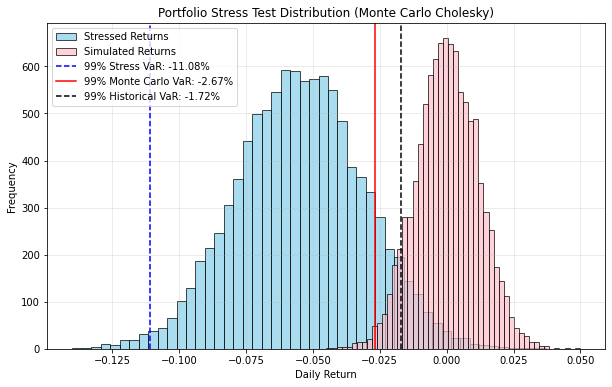

In [77]:
# Plot
plt.figure(figsize=(10, 6))
plt.hist(stress_results, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Stressed Returns')
plt.hist(simulated_returns, bins=50, alpha=0.7, color='pink', edgecolor='black', label='Simulated Returns')

plt.axvline(stress_var_99, color='blue', linestyle='--', label=f'99% Stress VaR: {stress_var_99:.2%}')
plt.axvline(var_99, color='r', linestyle='-', label=f'99% Monte Carlo VaR: {var_99:.2%}')
plt.axvline(history_var_99, color='black', linestyle='--', label=f'99% Historical VaR: {history_var_99:.2%}')

plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.title('Portfolio Stress Test Distribution (Monte Carlo Cholesky)')
plt.grid(True, alpha=0.3)
plt.show()